In [115]:
import pandas as pd

df = pd.read_csv('./Downloads/musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [116]:
#checking data types

df.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

In [117]:
#data statistics

df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [118]:
#checking data description of object type variables also
df.describe(include='all')

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598,6598,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
unique,NaN,102,6598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NON-MUSK-j146,288_1+55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3299.50000,NaN,NaN,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,NaN,NaN,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,NaN,NaN,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,NaN,NaN,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,NaN,NaN,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,NaN,NaN,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000


In [119]:
df.drop(['ID','molecule_name','conformation_name'], axis=1, inplace=True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [120]:
#checking dimensions of data
df.shape

(6598, 167)

In [121]:
##  checking null values 

df.isnull().values.any()

False

In [122]:
## splitting dataset in test and train set
from sklearn.model_selection import train_test_split

X= df.drop(['class'],axis=1)
y= df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [123]:
## checking number of samples in train and test set
print("train samples: ",len(X_train))
print("test samples: ",len(X_test))

train samples:  5278
test samples:  1320


In [124]:
## Transforming data using min max scalar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
from keras.models import Sequential,Model
from keras.layers import Dense

model = Sequential()

model.add(Dense(1000, input_shape=(166, ), activation='relu', name='Hidden_layer_1'))
model.add(Dense(500, activation='sigmoid', name='Hidden_layer_2'))
model.add(Dense(250, activation='relu', name='Hidden_layer_3'))
model.add(Dense(100, activation='sigmoid',name='Hidden_layer_4'))
model.add(Dense(50, activation='relu',name='Hidden_layer_5'))
model.add(Dense(1, activation='sigmoid', name='Output_layer'))


In [126]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_layer_1 (Dense)       (None, 1000)              167000    
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 500)               500500    
_________________________________________________________________
Hidden_layer_3 (Dense)       (None, 250)               125250    
_________________________________________________________________
Hidden_layer_4 (Dense)       (None, 100)               25100     
_________________________________________________________________
Hidden_layer_5 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 51        
Total params: 822,951
Trainable params: 822,951
Non-trainable params: 0
________________________________________________

In [127]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [128]:
from keras_tqdm import TQDMNotebookCallback

model_history = model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=2,
    callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)], validation_data=(X_test,y_test))


Train on 5278 samples, validate on 1320 samples


Epoch 1/40


 - 1s - loss: 0.3401 - acc: 0.8511 - val_loss: 0.1764 - val_acc: 0.9379

Epoch 2/40


 - 1s - loss: 0.1311 - acc: 0.9560 - val_loss: 0.1437 - val_acc: 0.9568

Epoch 3/40


 - 1s - loss: 0.0885 - acc: 0.9714 - val_loss: 0.0720 - val_acc: 0.9758

Epoch 4/40


 - 1s - loss: 0.0542 - acc: 0.9816 - val_loss: 0.0623 - val_acc: 0.9795

Epoch 5/40


 - 1s - loss: 0.0408 - acc: 0.9852 - val_loss: 0.0445 - val_acc: 0.9841

Epoch 6/40


 - 1s - loss: 0.0444 - acc: 0.9862 - val_loss: 0.0358 - val_acc: 0.9886

Epoch 7/40


 - 1s - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0344 - val_acc: 0.9879

Epoch 8/40


 - 1s - loss: 0.0100 - acc: 0.9973 - val_loss: 0.0661 - val_acc: 0.9841

Epoch 9/40


 - 1s - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0295 - val_acc: 0.9902

Epoch 10/40


 - 1s - loss: 0.0139 - acc: 0.9939 - val_loss: 0.0282 - val_acc: 0.9924

Epoch 11/40


 - 1s - loss: 0.0151 - acc: 0.9943 - val_loss: 0.0201 - val_acc: 0.9924

Epoch 12/40


 - 1s - loss: 0.0040 - acc: 0.9994 - val_loss: 0.0108 - val_acc: 0.9970

Epoch 13/40


 - 1s - loss: 0.0126 - acc: 0.9966 - val_loss: 0.0272 - val_acc: 0.9879

Epoch 14/40


 - 1s - loss: 0.0080 - acc: 0.9975 - val_loss: 0.0371 - val_acc: 0.9886

Epoch 15/40


 - 1s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0108 - val_acc: 0.9962

Epoch 16/40


 - 1s - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0150 - val_acc: 0.9962

Epoch 17/40


 - 0s - loss: 0.0062 - acc: 0.9979 - val_loss: 0.0721 - val_acc: 0.9871

Epoch 18/40


 - 0s - loss: 0.0091 - acc: 0.9973 - val_loss: 0.0107 - val_acc: 0.9962

Epoch 19/40


 - 1s - loss: 9.1952e-04 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 0.9970

Epoch 20/40


 - 1s - loss: 3.2702e-04 - acc: 1.0000 - val_loss: 0.0101 - val_acc: 0.9970

Epoch 21/40


 - 1s - loss: 2.3932e-04 - acc: 1.0000 - val_loss: 0.0104 - val_acc: 0.9970

Epoch 22/40


 - 1s - loss: 1.8087e-04 - acc: 1.0000 - val_loss: 0.0111 - val_acc: 0.9970

Epoch 23/40


 - 1s - loss: 1.4068e-04 - acc: 1.0000 - val_loss: 0.0120 - val_acc: 0.9970

Epoch 24/40


 - 1s - loss: 1.1647e-04 - acc: 1.0000 - val_loss: 0.0129 - val_acc: 0.9970

Epoch 25/40


 - 1s - loss: 1.0190e-04 - acc: 1.0000 - val_loss: 0.0135 - val_acc: 0.9970

Epoch 26/40


 - 1s - loss: 9.1067e-05 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 0.9970

Epoch 27/40


 - 1s - loss: 8.2495e-05 - acc: 1.0000 - val_loss: 0.0144 - val_acc: 0.9970

Epoch 28/40


 - 1s - loss: 7.4877e-05 - acc: 1.0000 - val_loss: 0.0149 - val_acc: 0.9970

Epoch 29/40


 - 1s - loss: 6.8223e-05 - acc: 1.0000 - val_loss: 0.0153 - val_acc: 0.9970

Epoch 30/40


 - 1s - loss: 6.2616e-05 - acc: 1.0000 - val_loss: 0.0156 - val_acc: 0.9970

Epoch 31/40


 - 1s - loss: 5.7445e-05 - acc: 1.0000 - val_loss: 0.0159 - val_acc: 0.9970

Epoch 32/40


 - 1s - loss: 5.2866e-05 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 0.9970

Epoch 33/40


 - 1s - loss: 4.9105e-05 - acc: 1.0000 - val_loss: 0.0164 - val_acc: 0.9970

Epoch 34/40


 - 1s - loss: 4.5776e-05 - acc: 1.0000 - val_loss: 0.0167 - val_acc: 0.9970

Epoch 35/40


 - 1s - loss: 4.2782e-05 - acc: 1.0000 - val_loss: 0.0169 - val_acc: 0.9970

Epoch 36/40


 - 1s - loss: 4.0085e-05 - acc: 1.0000 - val_loss: 0.0171 - val_acc: 0.9970

Epoch 37/40


 - 1s - loss: 3.7601e-05 - acc: 1.0000 - val_loss: 0.0173 - val_acc: 0.9970

Epoch 38/40


 - 1s - loss: 3.5327e-05 - acc: 1.0000 - val_loss: 0.0175 - val_acc: 0.9970

Epoch 39/40


 - 1s - loss: 3.3298e-05 - acc: 1.0000 - val_loss: 0.0177 - val_acc: 0.9970

Epoch 40/40


 - 1s - loss: 3.1431e-05 - acc: 1.0000 - val_loss: 0.0178 - val_acc: 0.9970




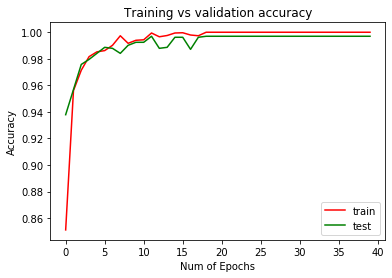

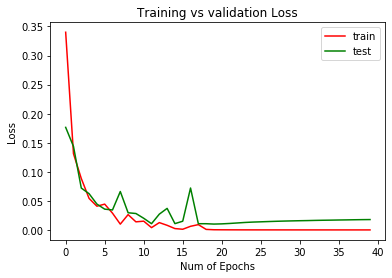

In [129]:
## plotting accuracy, loss

from matplotlib import pyplot as plt

plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.title('Training vs validation accuracy')
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.title('Training vs validation Loss')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])


plt.show()

In [130]:
## Evaluate the trained model
loss, acc = model.evaluate(x=X_test, y=y_test, batch_size=128, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

print("Loss is:",loss)
print("Accuracy is:",acc)

1320/1320 [==============================] - 0s 20us/step
Loss is: 0.017844072127583346
Accuracy is: 0.9969696998596191


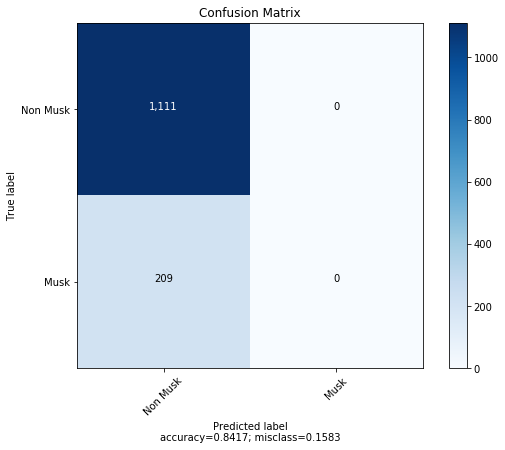

In [131]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test).astype('int').flatten()
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix,
                      normalize    = False,
                      target_names = ['Non Musk', 'Musk'],
                      title        = "Confusion Matrix")

In [132]:
from sklearn.metrics import classification_report
cls = classification_report(y_test,Y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1111
           1       0.00      0.00      0.00       209

    accuracy                           0.84      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.71      0.84      0.77      1320



/home/guneet/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("/home/guneet/Desktop/DEPLOY/Assignment_2/models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/guneet/Desktop/DEPLOY/Assignment_2/models/model.h5")
print("Saved model to disk")

Saved model to disk
